First 5 Rows:


C:\Users\19894\AppData\Local\Temp\ipykernel_1628\1311329995.py:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport  # may need: pip install pandas-profiling


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Summary Statistics:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\19894\AppData\Local\Temp\ipykernel_1628\1311329995.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="survived", data=titanic, palette="coolwarm")


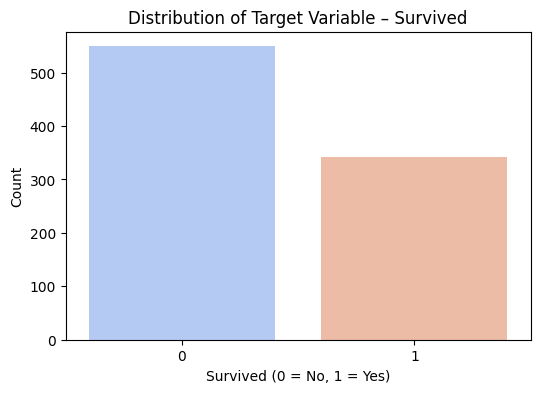

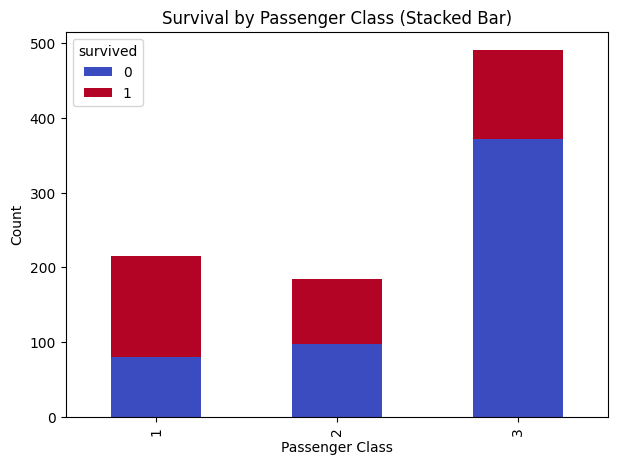

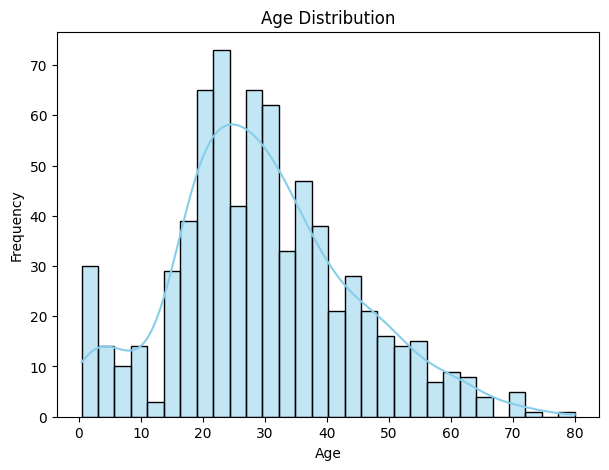

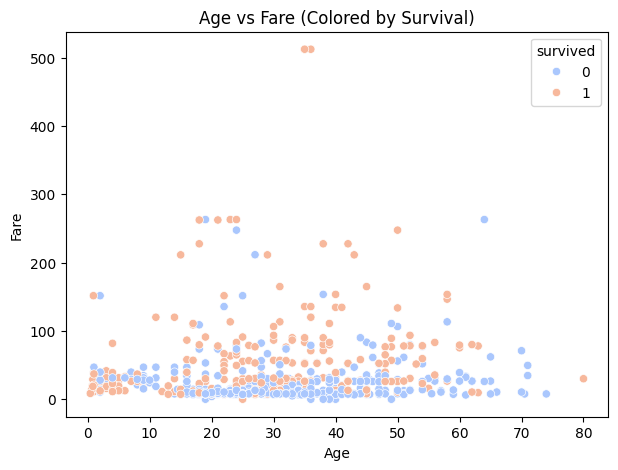

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 97.89it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

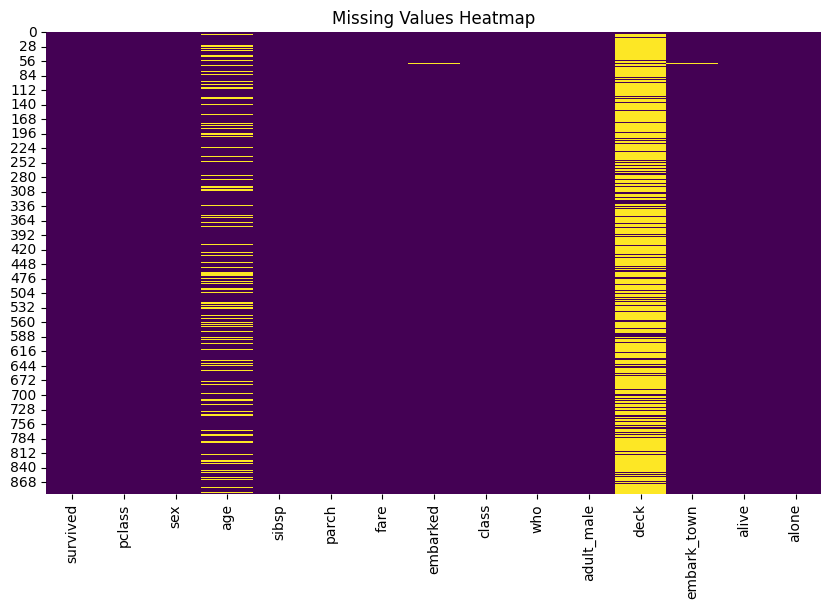

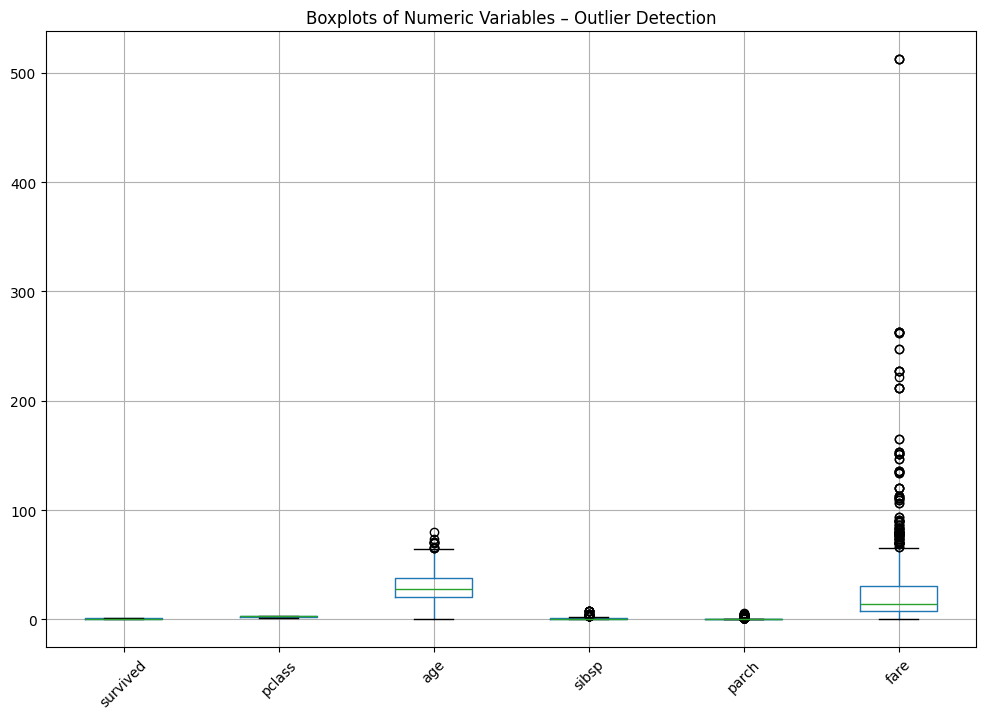

ValueError: could not convert string to float: 'male'

<Figure size 1000x800 with 0 Axes>

In [1]:
# Week 7 – Titanic Data Exploration
# Michael Kamp – Data 747 – Davenport University

# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport  # may need: pip install pandas-profiling

# Load Titanic dataset from Seaborn
titanic = sns.load_dataset("titanic")

# Optional: verify dataset loaded
titanic.count()

# 1. Display first 5 rows
print("First 5 Rows:")
display(titanic.head())

# 2. Summary statistics
print("\nSummary Statistics:")
display(titanic.describe(include="all"))

# 3. Visualize the distribution of the target variable (Survived)
plt.figure(figsize=(6,4))
sns.countplot(x="survived", data=titanic, palette="coolwarm")
plt.title("Distribution of Target Variable – Survived")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 4. Distribution of target variable by class (stacked bar chart)
class_survival = pd.crosstab(titanic["pclass"], titanic["survived"])
class_survival.plot(kind="bar", stacked=True, figsize=(7,5), colormap="coolwarm")
plt.title("Survival by Passenger Class (Stacked Bar)")
plt.xlabel("Passenger Class")
plt.ylabel("Count")
plt.show()

# 5. Histogram of Age
plt.figure(figsize=(7,5))
sns.histplot(titanic["age"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 6. Scatter plot: Age vs Fare
plt.figure(figsize=(7,5))
sns.scatterplot(x="age", y="fare", hue="survived", data=titanic, palette="coolwarm")
plt.title("Age vs Fare (Colored by Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# 7. Generate Pandas Profiling Report
profile = ProfileReport(titanic, title="Titanic Dataset Profiling Report", explorative=True)
profile.to_file("Titanic_Profile_Report.html")

# 8. Identify & visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(titanic.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

# 9. Identify & visualize outliers with boxplots
numeric_cols = titanic.select_dtypes(include=np.number).columns
plt.figure(figsize=(12,8))
titanic[numeric_cols].boxplot()
plt.title("Boxplots of Numeric Variables – Outlier Detection")
plt.xticks(rotation=45)
plt.show()

# 10. Identify & visualize correlations between numeric variables
plt.figure(figsize=(10,8))
sns.heatmap(titanic.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()
